## **Data Analytics Project: Bike Sharing Dataset**



*   **Name:** Faiza Al Laily Nasron
*   **Email:** faizaallaily@gmail.com
*   **ID Dicoding:** faiza_al_laily







## **Defining Business Questions**



*   How does the number of casual riders compare to registered riders
*   What is the trend in the number of rental bikes from the last few years?
*   What are the rental bikes patterns by month and riders type?
*   What are the rental bikes patterns by day in a week?
*   What are the rental bikes patterns by hour? Are there certain hours where the demand for rental bikes is higher?
*   Does the weather affect the number of rental bikes?
*   During which season is the number of rental bikes highest?



## **Import All Packages/Libraries Used**

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Data Wrangling**

### Gathering Data

**About Dataset**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.

**Attribute Information:** Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [226]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [227]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Note: the data in the day_df table is not used in the next step. This is based on existing business questions and because the data in day_df and hour_df are basically the same and the only difference is the absence of hour data in the day_df table so that in this data analysis only the data in the hour_df table is used.**

### Assessing Data

1. Check for Data Type



In [228]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


From the existing data, it is known that there is an incorrect data type in the column:



* dteday is an object data type which should be datetime
* season, yr, mnth, hr, holiday, weekday, workingday, weathersit which are each integer data types that should be category data types

Besides the incorrect data types, the naming of some of the columns is also unclear. Therefore, improvements need to be made, namely:


*   dteday -> dateday
*   yr -> year
*   mnth -> month
*   hr -> hour
*   weathersit -> weather
*   hum -> humidity
*   cnt -> count





2. Check for Missing Value

In [229]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the results above, it is known that there are no missing values.

3. Check for Duplicate Data

In [230]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


From the results above, it is known that there is no duplicate data.

4. Check Statistical Summary

In [231]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There are no anomalies in the statistical summary.

### Cleaning Data

1. Change the Column Name

In [232]:
hour_df = hour_df.rename(columns={'dteday': 'dateday',
                                  'yr': 'year',
                                  'mnth': 'month',
                                  'hr': 'hour',
                                  'weathersit': 'weather',
                                  'hum': 'humidity',
                                  'cnt': 'count'})
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Change the Data Type

In [233]:
# Change the data type of the dateday column from int to datetime
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [234]:
# Change the data type of the season, year, month, hour, holiday, weekday, workingday, weather columns to categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather'] = hour_df.weather.astype('category')

In [235]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [236]:
# Convert the contents year column to make it easier to understand
hour_df['year'] = hour_df['dateday'].dt.year
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [237]:
# Convert the contents month column to make it easier to understand
hour_df['month'] = hour_df['dateday'].dt.month_name()
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [238]:
# Convert the contents of weekday column to make it easier to understand
hour_df['weekday'] = hour_df['dateday'].dt.day_name()
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [239]:
# Convert the contents season column and weather column to make it easier to understand
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weather'] = hour_df['weather'].map({1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Severe Weather'})
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [240]:
# Delete the instant column because it does not affect the data analysis process
hour_df.drop(['instant'], axis=1, inplace=True)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  int64         
 3   month       17379 non-null  object        
 4   hour        17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  category      
 8   weather     17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: category(5), dateti

## **Exploratory Data Analysis (EDA)**

In [241]:
# Identify the rental bikes trend from the past few years
yearly_rentals_df = hour_df.groupby(by='year')['count'].sum().reset_index()
yearly_rentals_df.sort_values(by='count', ascending=False)
yearly_rentals_df.head()

,year,count
0,2011,1243103
1,2012,2049576


From the table it can be concluded that the number of rental bikes in 2012 has increased from the previous year.

In [242]:
# Identify the rental bikes pattern by months and riders type
monthly_rentals_df = hour_df.resample(rule='M', on='dateday').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

monthly_rentals_df

,casual,registered,count
dateday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821
2011-06-30,30612,112900,143512
2011-07-31,36452,104889,141341
2011-08-31,28842,107849,136691
2011-09-30,26545,100873,127418


The table shows the difference between the number of rental bikes of casual riders and registered riders. It also shows the overall pattern of rental bikes (casual riders and registered riders combined) in every month.

In [243]:
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%b-%y')

In [244]:
monthly_rentals_df.head()

,casual,registered,count
dateday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821


In [245]:
monthly_rentals_df = monthly_rentals_df.reset_index()

In [246]:
monthly_rentals_df.rename(columns={
        "dateday": "yearmonth",
        "count": "total_rental_bike",
        "casual": "casual_rider",
        "registered": "registered_rider"
    }, inplace=True)

In [247]:
monthly_rentals_df.head()

,yearmonth,casual_rider,registered_rider,total_rental_bike
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


As before, this table shows the difference between the number of rental bikes from regular and registered riders. It also shows the overall pattern of rental bicycles (regular and registered riders combined) in each month. The difference is that the writing of the column contents is easier to understand.

In [248]:
# Identify the rental bikes pattern by day in a week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rentals_df = hour_df.groupby(['weekday'])['count'].sum().reindex(weekday_order).reset_index()
daily_rentals_df.sort_values(by='count', ascending=False)
daily_rentals_df

,weekday,count
0,Monday,455503
1,Tuesday,469109
2,Wednesday,473048
3,Thursday,485395
4,Friday,487790
5,Saturday,477807
6,Sunday,444027


From the table, it can be seen that the highest number of rental bikes occurred on Friday and the lowest occurred on Sunday.

In [249]:
# Identify the rental bikes pattern by hour
hourly_rentals_df = hour_df.groupby(by='hour')['count'].sum().reset_index()
hourly_rentals_df.head()

,hour,count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428


The table presents the top five data of rental bikes by hours.

In [250]:
hourly_day_rentals = hour_df.groupby(['weekday', 'hour'])['count'].sum().unstack()

# Find the days that have the highest number of rental bikes at each hour
busiest_day_per_hour = hourly_day_rentals.idxmax()

print("Days are most crowded at certain hours:")
print(busiest_day_per_hour)


Days are most crowded at certain hours:
hour
0      Saturday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
5     Wednesday
6     Wednesday
7     Wednesday
8     Wednesday
9        Friday
10     Saturday
11     Saturday
12     Saturday
13     Saturday
14     Saturday
15     Saturday
16     Saturday
17      Tuesday
18      Tuesday
19     Thursday
20     Thursday
21     Thursday
22     Thursday
23     Saturday
dtype: object


The table shows the days that have the highest number of rental bikes at each hour.

In [251]:
# DataFrame transposition to swap row and column axes
hourly_day_rentals_transposed = hourly_day_rentals.T

# Find the hour that have the highest number of rental bikes for each day
busiest_hour_per_day = hourly_day_rentals_transposed.idxmax()

print("The hour that have the highest number of rental bikes for each day:")
print(busiest_hour_per_day)

The hour that have the highest number of rental bikes for each day:
weekday
Friday       17
Monday       17
Saturday     13
Sunday       13
Thursday     17
Tuesday      17
Wednesday    17
dtype: int64


The table shows the hours that have the highest number of rental bikes on each day.

In [252]:
# Identify the rental bikes pattern by weather and riders type
weatherly_rentals_df = hour_df.groupby('weather').agg({
'casual': 'sum',
'registered': 'sum',
'count': 'sum'
}).reset_index()
weatherly_rentals_df = pd.melt(weatherly_rentals_df,
                               id_vars=['weather'],
                               value_vars=['casual', 'registered'],
                               var_name='type_of_riders',
                               value_name='count_riders')

weatherly_rentals_df['wheater'] = pd.Categorical(weatherly_rentals_df['weather'],
                                                 categories=['Clear/Party Cloudy', 'Misty/Cloudy', 'light Snow/Rain', 'Severe Weather'])

weatherly_rentals_df = weatherly_rentals_df.sort_values('weather')
print(weatherly_rentals_df)

               weather type_of_riders  count_riders         wheater
0  Clear/Partly Cloudy         casual        462745             NaN
4  Clear/Partly Cloudy     registered       1875428             NaN
1         Misty/Cloudy         casual        134481    Misty/Cloudy
5         Misty/Cloudy     registered        661471    Misty/Cloudy
2      Light Snow/Rain         casual         22783             NaN
6      Light Snow/Rain     registered        135548             NaN
3       Severe Weather         casual             8  Severe Weather
7       Severe Weather     registered           215  Severe Weather


From the tabel above it can be seen that both casual riders and registered riders are at their peak for the number of rental bikes when the weather is clear/partly cloudy.

In [253]:
# Identify the rental bikes pattern by weather and riders type
seasonly_rentals_df = hour_df.groupby('season').agg({
'casual': 'sum',
'registered': 'sum',
'count': 'sum'
}).reset_index()
seasonly_rentals_df = pd.melt(seasonly_rentals_df,
                              id_vars=['season'],
                              value_vars=['casual', 'registered'],
                              var_name='type_of_riders',
                              value_name='count_riders')

seasonly_rentals_df['season'] = pd.Categorical(seasonly_rentals_df['season'],
                                               categories=['Spring', 'Summer', 'Fall', 'Winter'])

seasonly_rentals_df = seasonly_rentals_df.sort_values('season')
print(seasonly_rentals_df )

   season type_of_riders  count_riders
0  Spring         casual         60622
4  Spring     registered        410726
1  Summer         casual        203522
5  Summer     registered        715067
2    Fall         casual        226091
6    Fall     registered        835038
3  Winter         casual        129782
7  Winter     registered        711831


From the tabel above casual riders and registered riders are at their peak for the number of rental bikes in the fall.

In [254]:
# Identify the rental bikes pattern by temperature and humidity
temperature_bins = pd.cut(hour_df['temp'], bins=5)
humidity_bins = pd.cut(hour_df['humidity'], bins=5)

temperature_rentals = hour_df.groupby(temperature_bins)['count'].sum()
humidity_rentals = hour_df.groupby(humidity_bins)['count'].sum()

In [255]:
print(temperature_rentals)

temp
(0.019, 0.216]      69624
(0.216, 0.412]     659269
(0.412, 0.608]     996132
(0.608, 0.804]    1336324
(0.804, 1.0]       231330
Name: count, dtype: int64


In [256]:
print(humidity_rentals)

humidity
(-0.001, 0.2]      21465
(0.2, 0.4]        686843
(0.4, 0.6]       1219823
(0.6, 0.8]        939003
(0.8, 1.0]        425545
Name: count, dtype: int64


## **Visualization and Explanatory Analysis**

### Question 1: How does the number of casual riders compare to registered riders?

In [257]:
total_casual_users = hour_df['casual'].sum()
total_registered_users = hour_df['registered'].sum()

data = {'Users': ['Casual Users', 'Registered Users'],
        'Total': [total_casual_users, total_registered_users]}

# Create a donut chart
fig = px.pie(data, values='Total',
             names='Users',
             hole=0.5,
             color_discrete_sequence=["navy", "skyblue", "red"],
             title='Comparison of Casual and Registered Users')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Based on the donut diagram above, it can be concluded that there are more registered riders than casual riders. With a percentage of 81.2% registered riders and 18.8% casual riders.

### Question 2.  What is the trend in the number of rental bikes from the last few years?

In [258]:
fig1 = px.pie(yearly_rentals_df,
             values='count',
             names='year',
             hole=0.5,
             color_discrete_sequence=["navy", "skyblue", "red"],
             title='Total Rentals per Year')
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.show()

Based on the donut diagram above, it can be concluded that the trend of rental bikes is increasing. It can be seen that the number of rental bikes in 2012 has increased by 24.4% from the previous year.

<ipython-input-259-e7aab7adc526>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




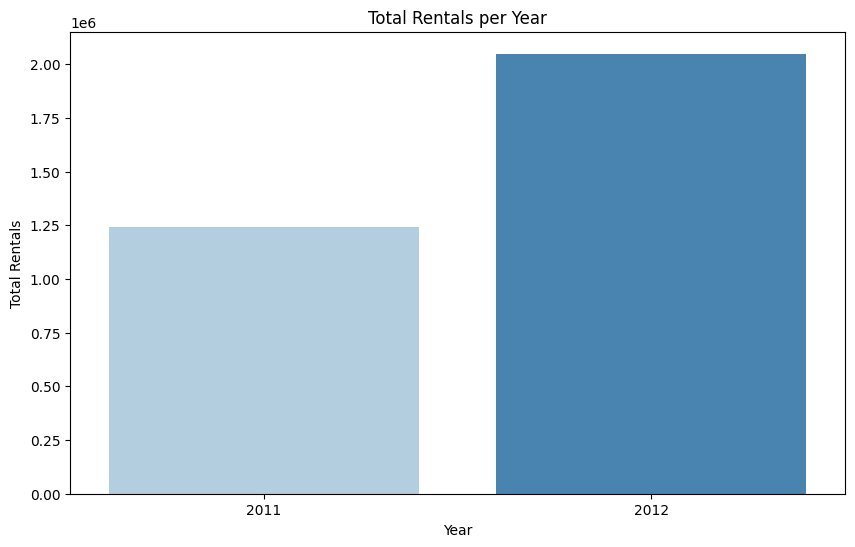

In [259]:
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_rentals_df, x='year', y='count', palette='Blues')
plt.title('Total Rentals per Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.show()

It is also clear from the above diagram that there has been a significant increase in the number of rental bikes.

### Question 3. What are the rental bikes patterns by month and riders type?

In [260]:
fig2 = px.line(monthly_rentals_df,
               x='yearmonth',
               y=['casual_rider', 'registered_rider', 'total_rental_bike'],
               color_discrete_sequence=["skyblue", "navy", "orange"],
               markers=True,
               title="Monthly Count of Rental Bikes")

# Update layout
fig2.update_layout(xaxis_title='', yaxis_title='Total Rental Bikes', xaxis_tickangle=45)
fig2.show()

From the diagram above we can see that there is a seasonality in those 2 years. The number of rental bikes at the beginning of the year is low then starts to increase in the second quarter and then decreases again in the fourth quarter. It is also seen that the number of registered riders is more than casual riders but both have the same pattern of the number of rental bikes.

### Question 4. What are the rental bikes patterns by day in a week?

In [261]:
fig3 = px.line(daily_rentals_df,
               x='weekday',
               y='count',
               markers=True,
               title='Total Rental Bikes per Day').update_layout(xaxis_title='Weekday', yaxis_title='Total Rental Bikes')
fig3.show()

From the diagram above, it can be seen that the highest number of rental bikes is on Friday then the lowest is on Sunday.

### Question 5.  What are the rental bikes patterns by hour? Are there certain hours where the demand for rental bikes is higher?

In [262]:
fig4 = px.bar(hourly_rentals_df, x='hour', y='count', title='Total Rental Bikes per Hour')
fig4.update_xaxes(title='Hour', tickmode='linear')
fig4.update_yaxes(title='Total Rental Bikes')
fig4.show()

From the diagram above, it can be seen that the number of rental bikes starts to increase at 5 am. Then it peaks at 8 am. before decreasing until it finally peaks again at 5 pm. After that it starts to decline again.

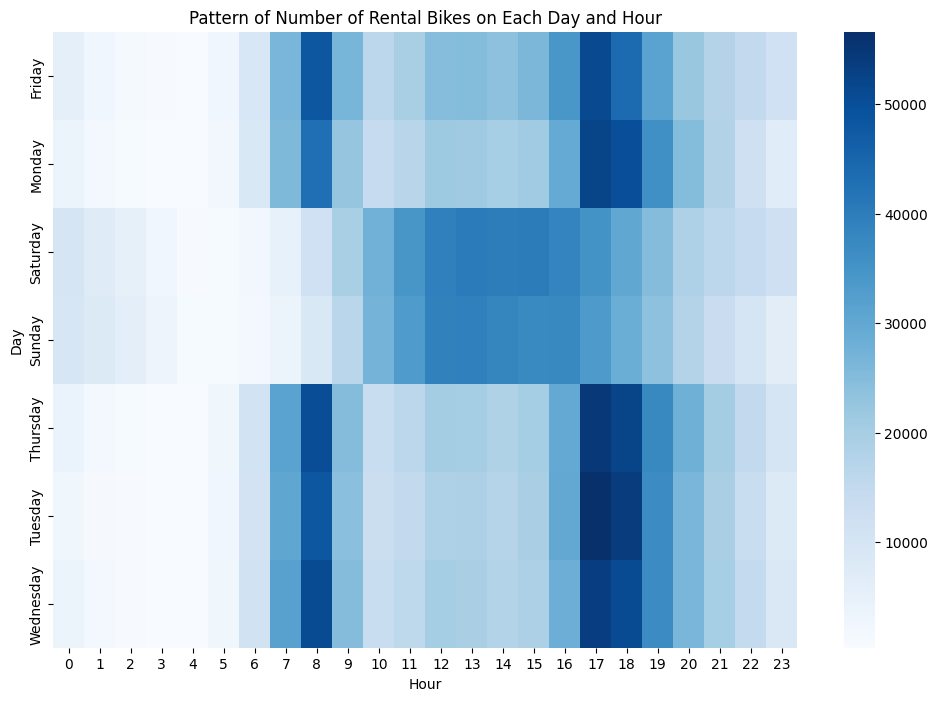

In [263]:
busiest_day_per_hour = hourly_day_rentals.idxmax()

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_day_rentals, cmap='Blues')
plt.title('Pattern of Number of Rental Bikes on Each Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

The heatmap above shows the number of rental bikes on each day and hour. Where the darker the color, the more the number of rental bikes.

### Question 6. Does the weather affect the number of rental bikes?

In [264]:
fig5 = px.bar(weatherly_rentals_df,
              x='weather',
              y=['count_riders'],
              color='type_of_riders',
              color_discrete_sequence=["navy", "skyblue", "red"],
              title='Count of Rental Bikes by Weather and Rider Type').update_layout(xaxis_title='', yaxis_title='Total Rental Bikes')
fig5.show()

Based on the diagram above, it is clear that weather affects the number of rental bikes. It can be seen that both casual riders and registered riders are at their peak for the number of rental bikes when the weather is clear/partly cloudy. Then it is at its lowest point during severe weather.

### Question 7. During which season is the number of rental bikes highest?

In [265]:
fig6 = px.bar(seasonly_rentals_df,
              x='season',
              y=['count_riders'],
              color='type_of_riders',
              color_discrete_sequence=["navy", "skyblue", "red"],
              title='Count of Rental Bikes by Season and Rider Type').update_layout(xaxis_title='', yaxis_title='Total Rental Bikes')
fig6.show()

Based on the diagram above, casual riders and registered riders are at their peak for the number of rental bikes in the fall.

## **Conclusion**



* **Conclution Question 1**
  
  The donut chart analysis indicates a higher percentage of registered riders (81.2%) compared to casual riders (18.8%). This suggests that the majority of users are officially registered with the bikeshare program.

* **Conclution Question 2**

  The trend analysis reveals an increasing trend in bike rentals, with a 24.4% increase observed in 2012 compared to the previous year. This indicates a growing demand for bike rentals over time.

* **Conclution Question 3**

  The trend analysis reveals an increasing trend in bike rentals, with a 24.4% increase observed in 2012 compared to the previous year. This indicates a growing demand for bike rentals over time.

* **Conclution Question 4**

  The highest number of bike rentals occurs on Fridays, while the lowest is on Sundays. This suggests that weekdays witness higher rental activity, possibly due to commuting purposes, while weekends see reduced usage, likely for leisure activities.

* **Conclution Question 5**

  Bike rental activity peaks at 8:00 AM and 5:00 PM for registered users, indicating usage for commuting to and from work. Casual users exhibit a gradual increase in rentals throughout the day, with a peak in the afternoon and a decrease at night.

* **Conclution Question 6**

  Clear or partly cloudy weather conditions correlate with increased bike rental activity, while severe weather conditions lead to decreased usage. This suggests that weather significantly influences bikeshare usage patterns.

* **Conclution Question 7**
  
  Bike rental usage peaks during the fall season, indicating high demand during this time of the year.



